In [1]:
#packages
import math
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

In [48]:
# import dataset
chess = pd.read_csv('games.csv')
chess.head()

# Link to dataset on Google Drive https://drive.google.com/file/d/1MZxbwZrkP5ARW2b7psKb30b6QRMIm1Er/view?usp=sharing

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [ ]:
'''Introduction: I will observe the games played on Lichess provided in the dataset above. Below I will explore these 3 
hypotheses, along with some other cursory explorations:
1. White attacking the center of the board with e4 or d4 is more advantageous than more passive openings.
2. Black should look to break the symmetry with its second move with moves like c5 or Nf6.
3. There is a strong relationship between the rating of players and the amount of opening theory they understand.
'''

In [3]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
id                20058 non-null object
rated             20058 non-null bool
created_at        20058 non-null float64
last_move_at      20058 non-null float64
turns             20058 non-null int64
victory_status    20058 non-null object
winner            20058 non-null object
increment_code    20058 non-null object
white_id          20058 non-null object
white_rating      20058 non-null int64
black_id          20058 non-null object
black_rating      20058 non-null int64
moves             20058 non-null object
opening_eco       20058 non-null object
opening_name      20058 non-null object
opening_ply       20058 non-null int64
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [4]:
chess['opening_name'].value_counts()

Van't Kruijs Opening                                                                           368
Sicilian Defense                                                                               358
Sicilian Defense: Bowdler Attack                                                               296
Scotch Game                                                                                    271
French Defense: Knight Variation                                                               271
Scandinavian Defense: Mieses-Kotroc Variation                                                  259
Queen's Pawn Game: Mason Attack                                                                232
Queen's Pawn Game: Chigorin Variation                                                          229
Scandinavian Defense                                                                           223
Horwitz Defense                                                                                209
Caro-Kann 

D:\SteamLibrary\steamapps\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


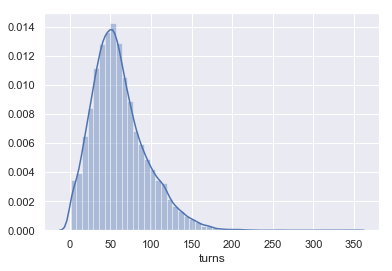

In [5]:
# Number of turns skewed right slightly, but approximately normal
sns.distplot(chess["turns"])

In [6]:
chess['increment_code'].value_counts()

10+0       7721
15+0       1311
15+15       850
5+5         738
5+8         697
8+0         588
10+5        579
15+10       461
20+0        448
30+0        375
10+10       355
15+5        314
7+2         265
10+2        187
30+30       169
5+10        155
25+0        152
10+3        149
10+8        123
10+15       103
20+10       103
15+2        100
45+45        97
9+0          94
20+5         88
8+8          81
180+0        76
30+10        75
15+8         75
8+5          70
           ... 
14+9          1
40+1          1
35+2          1
120+1         1
17+2          1
6+30          1
8+180         1
90+8          1
20+180        1
8+30          1
30+150        1
10+35         1
16+1          1
35+35         1
35+15         1
25+12         1
45+8          1
30+7          1
18+15         1
1+45          1
15+25         1
21+0          1
60+20         1
35+8          1
4+12          1
12+20         1
2+16          1
180+120       1
20+13         1
30+40         1
Name: increment_code, Le

In [7]:
chess['victory_status'].value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

In [8]:
# Creating a first move column
first_move = [i[:2] for i in chess['moves']]
print(first_move)

['d4', 'd4', 'e4', 'd4', 'e4', 'e4', 'd4', 'e4', 'e4', 'e4', 'e3', 'e4', 'e4', 'e4', 'e4', 'e4', 'e4', 'e4', 'e4', 'd4', 'e4', 'd4', 'e4', 'c4', 'e4', 'd4', 'e4', 'd4', 'd4', 'd4', 'e4', 'e4', 'e4', 'd4', 'e4', 'd4', 'd4', 'd4', 'e4', 'c4', 'e4', 'e4', 'e4', 'e4', 'e4', 'e4', 'e4', 'e4', 'e4', 'e4', 'd4', 'e4', 'd4', 'c4', 'Nf', 'e4', 'e4', 'e4', 'e4', 'e4', 'e4', 'd4', 'd4', 'd4', 'e4', 'Nf', 'd4', 'e4', 'd4', 'd4', 'd4', 'd4', 'e4', 'd4', 'e4', 'd4', 'd4', 'e4', 'd4', 'e4', 'd4', 'd4', 'c4', 'a4', 'd4', 'd4', 'e4', 'd4', 'd4', 'e4', 'd4', 'e4', 'd4', 'd4', 'd4', 'd4', 'd4', 'e4', 'd4', 'd4', 'e4', 'e4', 'e4', 'e4', 'd4', 'e4', 'e4', 'd4', 'd4', 'e4', 'd4', 'd4', 'd4', 'd4', 'e4', 'd4', 'd4', 'e4', 'e4', 'd4', 'Nf', 'd4', 'd4', 'e4', 'e4', 'e4', 'e4', 'e4', 'e4', 'e4', 'e4', 'd4', 'e4', 'e4', 'e4', 'd4', 'e4', 'c4', 'e4', 'd4', 'e4', 'e4', 'd4', 'e4', 'e4', 'd4', 'e4', 'e4', 'e4', 'd4', 'd4', 'e4', 'e4', 'e4', 'e4', 'Nf', 'e4', 'd4', 'e4', 'e4', 'e4', 'e4', 'e4', 'e4', 'e4', 'Nh', 'e4

In [9]:
# Creating a second move column
second_move = [i[3:6] for i in chess['moves']]
print(second_move)

['d5 ', 'Nc6', 'e5 ', 'd5 ', 'e5 ', 'c5 ', 'd5 ', 'Nc6', 'e5 ', 'd5 ', 'e6 ', 'e6 ', 'e6 ', 'e6 ', 'e5 ', 'e5 ', 'e5 ', 'e5 ', 'e5 ', 'd5 ', 'e5 ', 'e6 ', 'c5 ', 'Nc6', 'c5 ', 'd5 ', 'e5 ', 'd5 ', 'd5 ', 'd5 ', 'c5 ', 'c5 ', 'c5 ', 'd5 ', 'c5 ', 'g6 ', 'd5 ', 'Nf6', 'c5 ', 'e5 ', 'c5 ', 'c5 ', 'c5 ', 'c5 ', 'c5 ', 'c5 ', 'd5 ', 'c5 ', 'c5 ', 'd5 ', 'e6 ', 'e5 ', 'f5 ', 'e5 ', ' e5', 'c5 ', 'e5 ', 'e5 ', 'e5 ', 'e5 ', 'e6 ', 'g6 ', 'e6 ', 'Nf6', 'e6 ', ' g6', 'Nf6', 'e6 ', 'd5 ', 'd5 ', 'd6 ', 'Nf6', 'e6 ', 'd5 ', 'e6 ', 'e6 ', 'Nf6', 'e6 ', 'd5 ', 'e6 ', 'd5 ', 'Nf6', 'Nc6', 'e5 ', 'd5 ', 'c6 ', 'e6 ', 'Nf6', 'd5 ', 'e6 ', 'd5 ', 'e6 ', 'd5 ', 'd5 ', 'Nf6', 'e6 ', 'Nf6', 'e5 ', 'd5 ', 'd5 ', 'e6 ', 'e5 ', 'e6 ', 'e5 ', 'Nf6', 'e6 ', 'e6 ', 'd5 ', 'd5 ', 'e6 ', 'd5 ', 'd5 ', 'Nf6', 'd5 ', 'e5 ', 'd5 ', 'd5 ', 'e5 ', 'e5 ', 'Nf6', ' d5', 'd5 ', 'd6 ', 'e5 ', 'Nf6', 'c5 ', 'Nf6', 'e5 ', 'e5 ', 'e5 ', 'Nf6', 'Nf6', 'e5 ', 'Nf6', 'c6 ', 'd5 ', 'c5 ', 'e5 ', 'h5 ', 'Nf6', 'e5 ', 'Nf6', 'd5 '

In [10]:
chess['first_move'] = first_move
chess['second_move'] = second_move
chess.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,first_move,second_move
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,d4,d5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,d4,Nc6
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,e4,e5
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,d4,d5
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,e4,e5


In [11]:
chess_d = chess.loc[chess['first_move'] == "d4"]
chess_e = chess.loc[chess['first_move'] == "e4"]

In [12]:
chess_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4522 entries, 0 to 20057
Data columns (total 18 columns):
id                4522 non-null object
rated             4522 non-null bool
created_at        4522 non-null float64
last_move_at      4522 non-null float64
turns             4522 non-null int64
victory_status    4522 non-null object
winner            4522 non-null object
increment_code    4522 non-null object
white_id          4522 non-null object
white_rating      4522 non-null int64
black_id          4522 non-null object
black_rating      4522 non-null int64
moves             4522 non-null object
opening_eco       4522 non-null object
opening_name      4522 non-null object
opening_ply       4522 non-null int64
first_move        4522 non-null object
second_move       4522 non-null object
dtypes: bool(1), float64(2), int64(4), object(11)
memory usage: 640.3+ KB


In [13]:
chess_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12598 entries, 2 to 20056
Data columns (total 18 columns):
id                12598 non-null object
rated             12598 non-null bool
created_at        12598 non-null float64
last_move_at      12598 non-null float64
turns             12598 non-null int64
victory_status    12598 non-null object
winner            12598 non-null object
increment_code    12598 non-null object
white_id          12598 non-null object
white_rating      12598 non-null int64
black_id          12598 non-null object
black_rating      12598 non-null int64
moves             12598 non-null object
opening_eco       12598 non-null object
opening_name      12598 non-null object
opening_ply       12598 non-null int64
first_move        12598 non-null object
second_move       12598 non-null object
dtypes: bool(1), float64(2), int64(4), object(11)
memory usage: 1.7+ MB


In [14]:
chess['winner'].value_counts(normalize=True)

white    0.498604
black    0.454033
draw     0.047363
Name: winner, dtype: float64

In [15]:
chess_e['winner'].value_counts(normalize=True)

white    0.505715
black    0.448563
draw     0.045722
Name: winner, dtype: float64

In [16]:
chess_d['winner'].value_counts(normalize=True)

white    0.499337
black    0.451791
draw     0.048872
Name: winner, dtype: float64

In [17]:
chess['winner'].value_counts

<bound method IndexOpsMixin.value_counts of 0        white
1        black
2        white
3        white
4        white
5         draw
6        white
7        black
8        black
9        white
10       white
11       black
12       black
13       black
14       white
15       black
16       black
17       black
18       black
19       white
20       black
21       white
22       white
23       white
24       black
25       white
26       white
27       black
28       black
29       black
         ...  
20028    white
20029    black
20030    black
20031    black
20032    white
20033    black
20034     draw
20035    white
20036    white
20037    black
20038    black
20039    white
20040    black
20041    black
20042    white
20043    white
20044    white
20045    white
20046    black
20047    white
20048    white
20049    white
20050    white
20051    black
20052    white
20053    white
20054    black
20055    white
20056    white
20057    black
Name: winner, Length: 20058, dtype: objec

In [18]:
chess['first_move'].value_counts()

e4    12598
d4     4522
Nf      725
c4      716
e3      416
g3      186
b3      173
f4      166
d3      131
Nc       99
b4       88
c3       56
g4       38
h4       33
a4       28
a3       27
f3       23
Nh       15
h3       14
Na        4
Name: first_move, dtype: int64

In [19]:
#Change first moves to be accurate
chess['first_move'] = np.where(chess['first_move'] == "Nf", "Nf3", chess['first_move'])
chess['first_move'] = np.where(chess['first_move'] == "Nc", "Nc3", chess['first_move'])
chess['first_move'] = np.where(chess['first_move'] == "Nh", "Nh3", chess['first_move'])
chess['first_move'] = np.where(chess['first_move'] == "Na", "Na3", chess['first_move'])

In [20]:
#Change second moves to be accurate
chess['second_move'] = np.where(chess['second_move'] == "Nf", "Nf6", chess['second_move'])
chess['second_move'] = np.where(chess['second_move'] == "Nc", "Nc6", chess['second_move'])
chess['second_move'] = np.where(chess['second_move'] == "Nh", "Nh6", chess['second_move'])
chess['second_move'] = np.where(chess['second_move'] == "Na", "Na6", chess['second_move'])

In [21]:
chess['second_move'].value_counts()

e5     6872
d5     3344
c5     2801
e6     1966
Nf6    1558
c6      710
d6      496
g6      354
Nc6     317
 d5     279
b6      262
f5      152
 Nf     135
 e6      81
 Nc      75
 c5      71
 e5      70
a6       48
e5       46
d5       44
e6       36
 d6      35
f6       33
 g6      31
b5       22
h5       22
a5       21
 b6      20
 c6      20
         18
h6       17
g5       17
d6       12
c5       11
Nh6      11
 f5      11
 f6       6
Na6       4
b6        4
c6        4
f5        3
f6        2
g6        2
h5        2
a5        2
 Na       2
 b5       2
 a6       2
g5        1
 Nh       1
 h6       1
h6        1
b5        1
Name: second_move, dtype: int64

In [22]:
f = pd.crosstab(chess['first_move'], chess['winner'])
f

winner,black,draw,white
first_move,,,
Na3,3,0,1
Nc3,55,2,42
Nf3,292,60,373
Nh3,6,0,9
a3,9,1,17
a4,18,1,9
b3,83,8,82
b4,36,4,48
c3,25,0,31


In [23]:
f.groupby('black', as_index=False).sum()

winner,black,draw,white
0,3,0,1
1,6,0,9
2,7,0,7
3,9,1,17
4,13,2,8
5,18,1,9
6,25,4,48
7,36,4,48
8,55,2,42
9,79,2,50


In [24]:
pd.crosstab(chess['first_move'], chess['victory_status']).apply(lambda r: r/r.sum(), axis=1)

victory_status,draw,mate,outoftime,resign
first_move,,,,
Na3,0.000000,0.500000,0.000000,0.500000
Nc3,0.020202,0.474747,0.070707,0.434343
Nf3,0.080000,0.284138,0.088276,0.547586
Nh3,0.000000,0.266667,0.266667,0.466667
a3,0.037037,0.481481,0.074074,0.407407
a4,0.035714,0.428571,0.071429,0.464286
b3,0.046243,0.300578,0.109827,0.543353
b4,0.045455,0.295455,0.079545,0.579545
c3,0.000000,0.303571,0.089286,0.607143


In [25]:
pd.crosstab(chess_e['second_move'], chess_e['winner']).apply(lambda r: r/r.sum(), axis=1)

winner,black,draw,white
second_move,,,
,0.000000,0.000000,1.000000
Na6,0.000000,0.000000,1.000000
Nc6,0.337900,0.054795,0.607306
Nf6,0.437209,0.055814,0.506977
Nh6,0.166667,0.000000,0.833333
a5,0.000000,0.000000,1.000000
a5,0.400000,0.000000,0.600000
a6,0.368421,0.078947,0.552632
b5,0.000000,0.000000,1.000000


In [26]:
pd.crosstab(chess_e['second_move'], chess_e['winner'], margins=True)

winner,black,draw,white,All
second_move,,,,
,0,0,12,12
Na6,0,0,3,3
Nc6,74,12,133,219
Nf6,94,12,109,215
Nh6,1,0,5,6
a5,0,0,2,2
a5,4,0,6,10
a6,14,3,21,38
b5,0,0,1,1


In [27]:
pd.crosstab(chess_d['second_move'], chess_d['winner'])

winner,black,draw,white
second_move,,,
,0,0,3
Na6,0,0,1
Nc6,29,3,24
Nf6,553,71,514
Nh6,1,0,2
a5,0,0,4
a6,4,0,4
b5,2,0,12
b6,25,0,26


In [28]:
pd.crosstab(chess_d['second_move'], chess_d['winner']).apply(lambda r: r/r.sum(), axis=1)

winner,black,draw,white
second_move,,,
,0.000000,0.000000,1.000000
Na6,0.000000,0.000000,1.000000
Nc6,0.517857,0.053571,0.428571
Nf6,0.485940,0.062390,0.451670
Nh6,0.333333,0.000000,0.666667
a5,0.000000,0.000000,1.000000
a6,0.500000,0.000000,0.500000
b5,0.142857,0.000000,0.857143
b6,0.490196,0.000000,0.509804


In [29]:
rating_sum = chess['white_rating'] + chess['black_rating']
chess['rating_sum'] = rating_sum
chess.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,first_move,second_move,rating_sum
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,d4,d5,2691
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,d4,Nc6,2583
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,e4,e5,2996
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,d4,d5,2893
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,e4,e5,2992


In [30]:
# Correlation between number of turns and total rating
stats.pearsonr(chess['turns'], chess['rating_sum'])
#This correlation shows that there is a statistically significant relatonship between the number of turns and
#the rating of the players involved. The more number of turns the game is, the more likely that the players have a high rating

(0.16052611503974723, 7.048087257255531e-116)

In [31]:
# Correlation between opening theory and total rating
stats.pearsonr(chess['opening_ply'], chess['rating_sum'])
# This correlation shows that there is a statistically significant relatonship between the number of moves in the opening theory
# and the rating of the players involved. This lines up with what we might expect, since players of higher rating will have
# more knowledge of opening theory

(0.29470453988325873, 0.0)

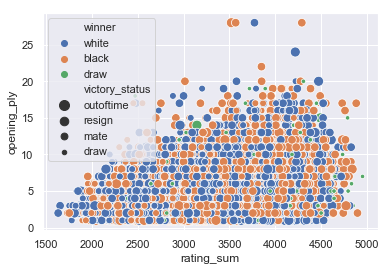

In [32]:
sns.scatterplot(y='opening_ply',x='rating_sum', hue='winner', data=chess, size='victory_status', sizes=(20,100))

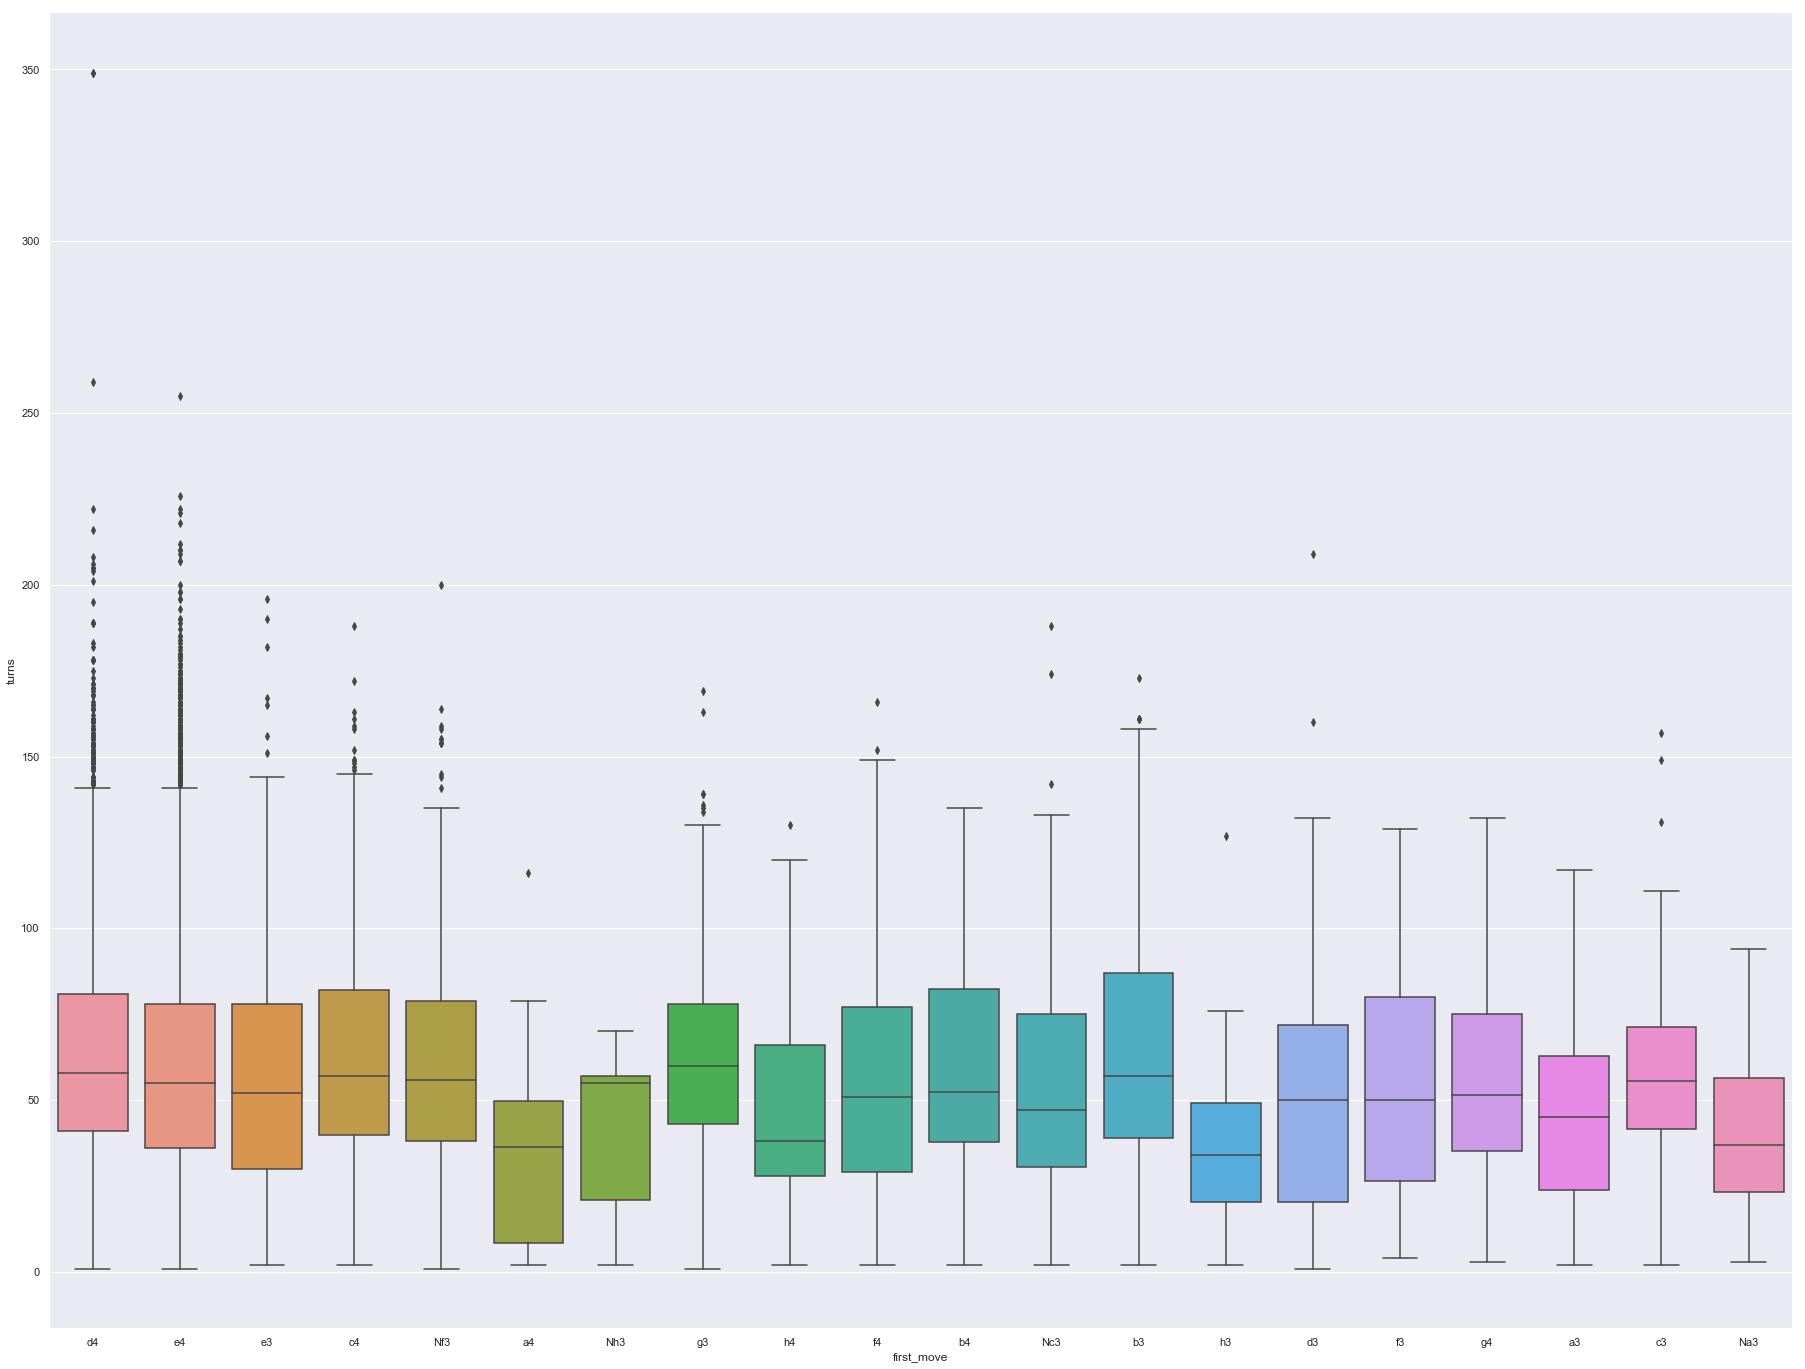

In [47]:
# Relationship between the first move by white and how long the game lasted.
s=sns.catplot(x="first_move", y = "turns", kind="box", data=chess)
s.fig.set_size_inches(30,22)

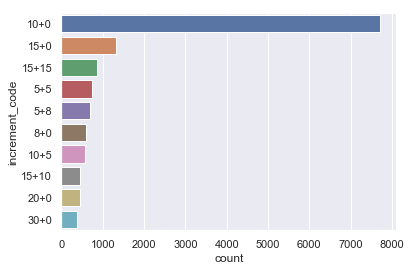

In [34]:
# Most popular time increments
t=sns.countplot(y = "increment_code", data=chess, order=chess.increment_code.value_counts().iloc[:10].index)

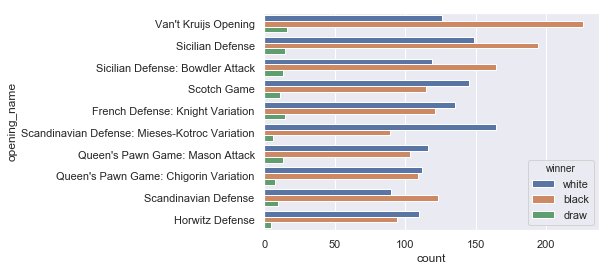

In [35]:
# Top 10 most popular opening lines
w=sns.countplot(y = "opening_name", data=chess, hue="winner", order=chess.opening_name.value_counts().iloc[:10].index)

D:\SteamLibrary\steamapps\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


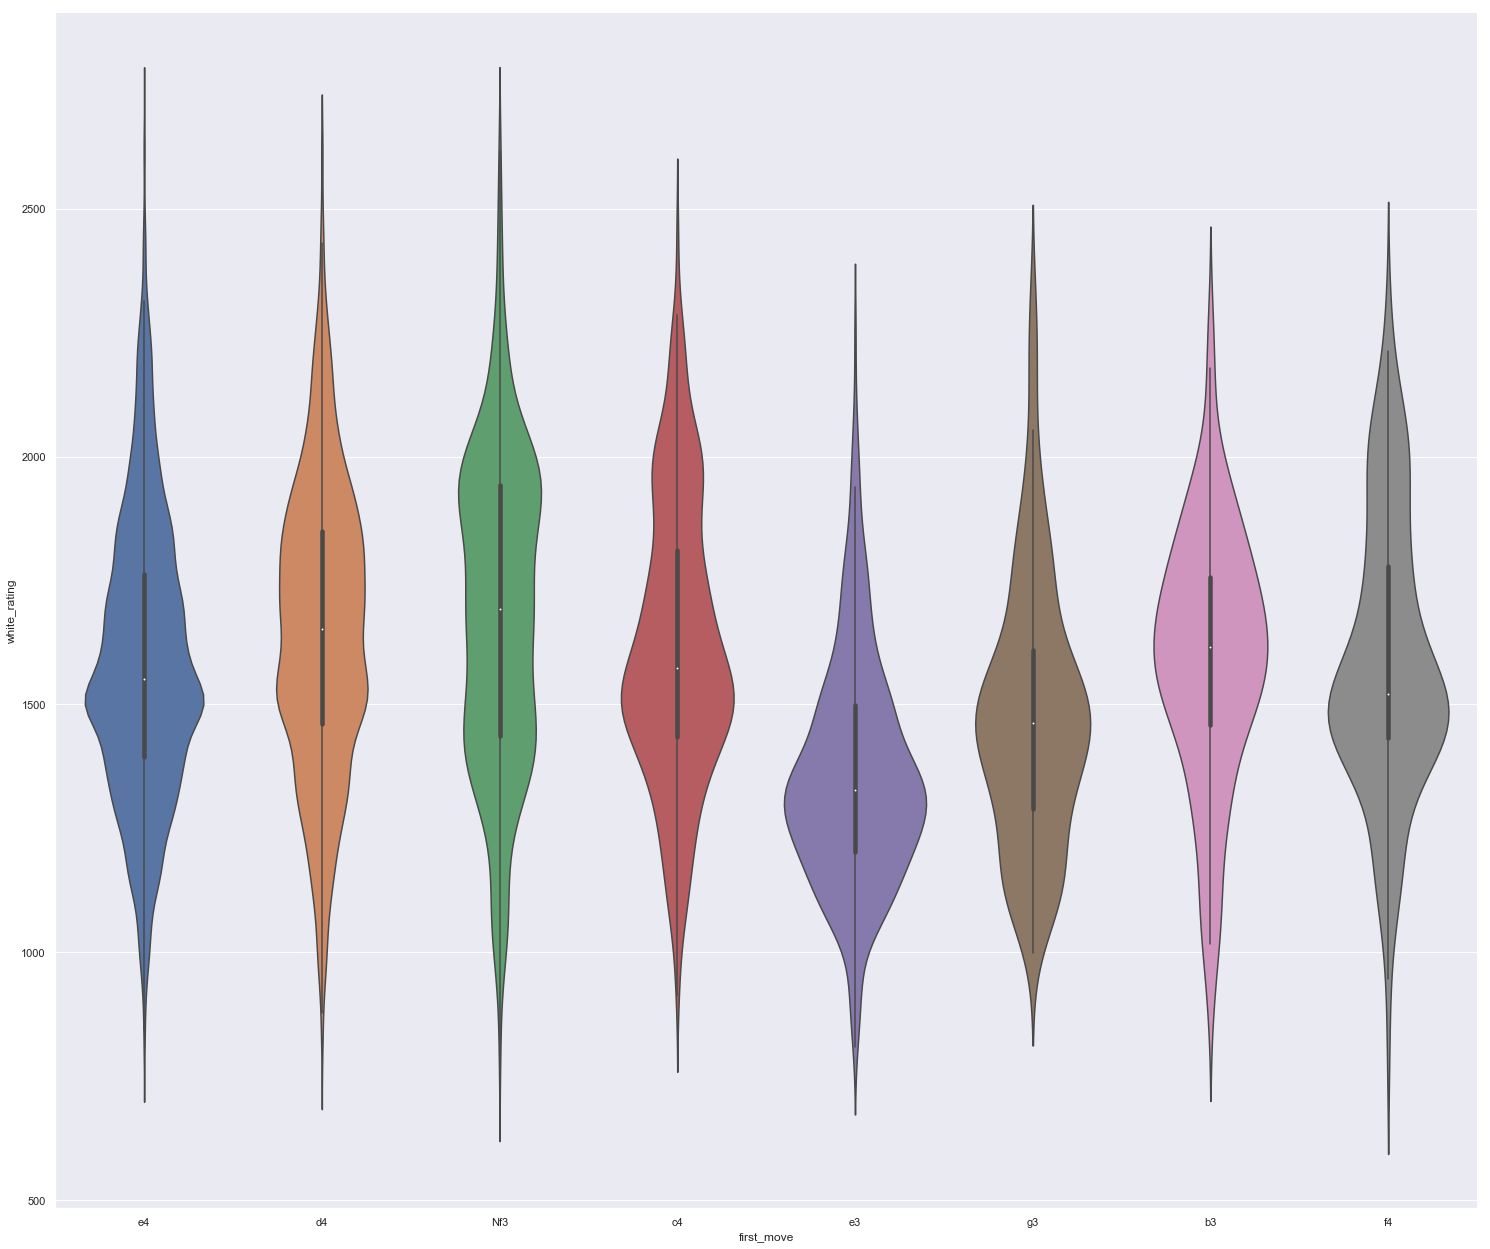

In [46]:
# First move by white and the rating of the white player
d = sns.catplot(x="first_move", y="white_rating", kind="violin", data=chess, order=chess.first_move.value_counts().iloc[:8].index)
d.fig.set_size_inches(25,20)

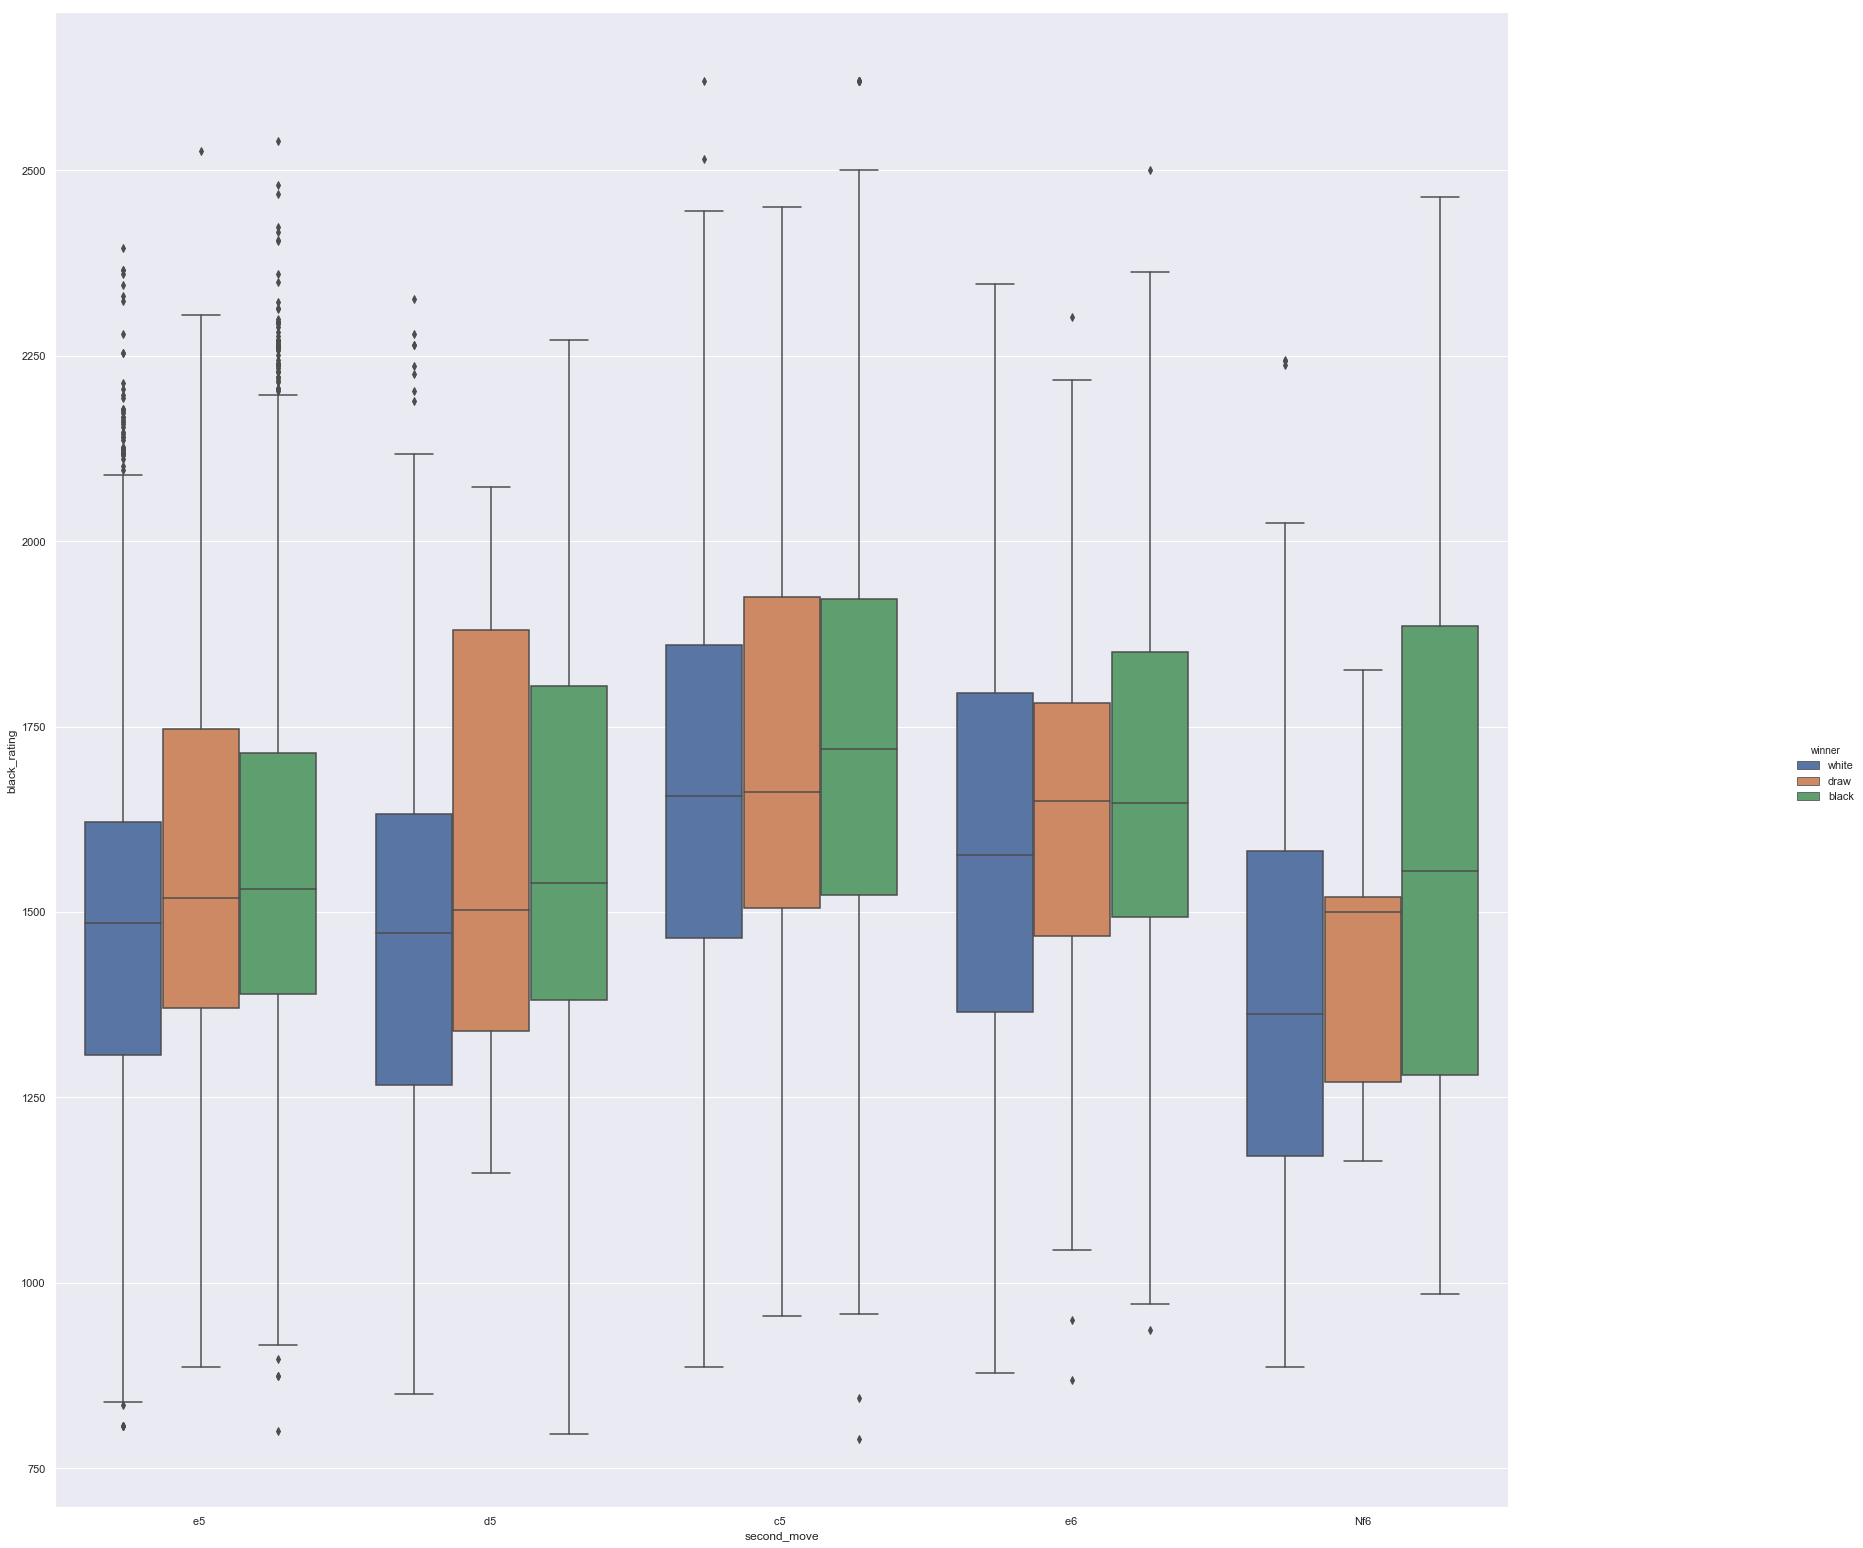

In [37]:
# Second move by black against an opening of e4 by white against the rating of the black player.
c = sns.catplot(x="second_move", y="black_rating", kind="box", hue="winner", data=chess_e, order=chess.second_move.value_counts().iloc[:5].index)
c.fig.set_size_inches(30,25)

In [38]:
chess.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,rating_sum
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981,3185.463855
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152,526.347651
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000,1633.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000,2813.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000,3137.500000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000,3542.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000,4951.000000


D:\SteamLibrary\steamapps\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


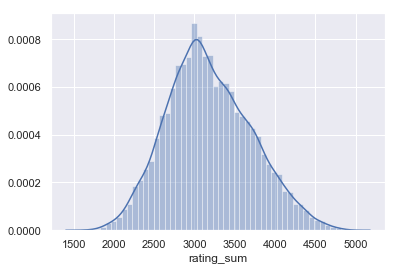

In [39]:
# The ratings are normally distributed
sns.distplot(chess['rating_sum'])

In [ ]:
'''Conclusion: Based on the results gathered from this data, I would say that the disadvantage that black has is stemmed 
largely from players not understanding how to counterplay against white. When white strikes in the center with something 
like e4, most average players lose a lot by simply responding with e5. Here is a graphic showing the rating of black 
players and their responses to the most common white move, e4.
'''